In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from annoy import AnnoyIndex
import time
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [596]:
#cek missing value
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [597]:
df = df.drop('ID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [598]:
# #normalisasi data
std = StandardScaler()
# df[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
#     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = std.fit_transform(df[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
#     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

# df['EDUCATION'] = std.fit_transform(df[['EDUCATION']])
# df = std.fit_transform(df)
# df.head()

In [599]:
# menambah fitur baru
df['BalancePerPurchases'] = df['LIMIT_BAL'] / df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
# df.head()

In [600]:
# membersihkan nilai INF pada kolom BalancePerPurchases dengan 0
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['BalancePerPurchases'].fillna(0, inplace=True)
df.head()

C:\Users\GIO\AppData\Local\Temp\ipykernel_2100\117935536.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BalancePerPurchases'].fillna(0, inplace=True)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BalancePerPurchases
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,15.576324
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,42.161972
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,5.312190
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1.296826
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,2.743760


In [601]:
#seleksi fitur
# x = df[['AGE','MARRIAGE', 'EDUCATION', 'LIMIT_BAL','BalancePerPurchases']]
x = df[[ 'EDUCATION','BalancePerPurchases']]
x.describe()

,EDUCATION,BalancePerPurchases
count,30000.000000,30000.000000
mean,1.853133,15.871421
std,0.790349,3314.755098
min,0.000000,-360000.000000
25%,1.000000,1.355127
50%,2.000000,2.902847
75%,2.000000,22.694531
max,6.000000,39600.000000


In [602]:
# #normalisasi data
# std = StandardScaler()
# df[['LIMIT_BAL','AGE', 'BalancePerPurchases', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
#     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = std.fit_transform(df[['LIMIT_BAL', 'AGE', 'BalancePerPurchases', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
#     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

# df.head()

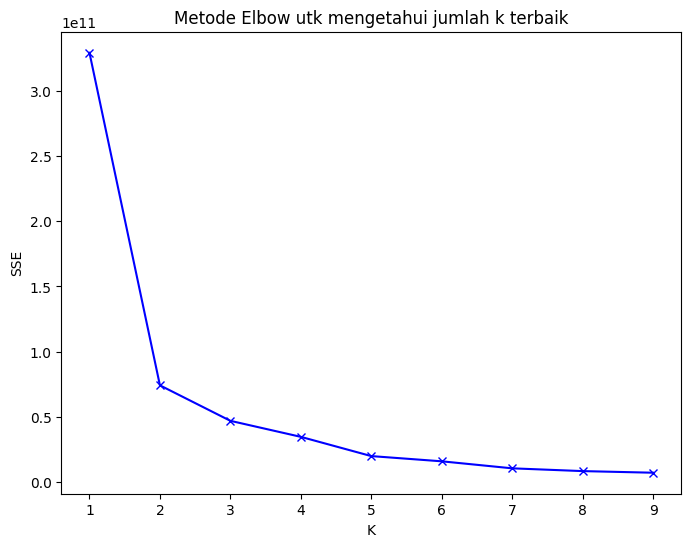

In [603]:
#elbow buat cari k
sse = []

#cari k terbaik 1-10
K = range(1, 10)

#cek nilai sse tiap K
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeanModel.fit(x)
    sse.append(kmeanModel.inertia_)

#plot distorsi
plt.figure(figsize=(8,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Metode Elbow utk mengetahui jumlah k terbaik')
plt.show()

In [604]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=329617071890.0762
k=2; SSE=74020649344.06839
k=3; SSE=46734475744.147446
k=4; SSE=34420025743.947395
k=5; SSE=19635225703.424694
k=6; SSE=15619192347.845749
k=7; SSE=10230478418.220991
k=8; SSE=8100867685.458311
k=9; SSE=6852947870.714503


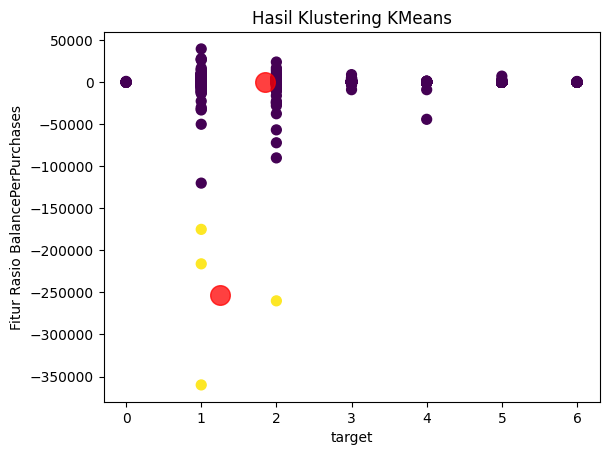

In [605]:
# KMEANS 
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x)
y = kmeans.predict(x)

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75)
plt.title('Hasil Klustering KMeans')
plt.xlabel('target')
plt.ylabel('Fitur Rasio BalancePerPurchases')
plt.show()





In [606]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x)
labels = kmeans.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("estimasi jumlah kluster: %d" % n_clusters_)
print("estimasi jumlah noise: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, labels): .3f}")
print(f"Davies Bouldin Coefficient: {metrics.davies_bouldin_score(x, labels): .3f}")
print("======================================================")

estimasi jumlah kluster: 2
estimasi jumlah noise: 0
Silhouette Coefficient:  0.999
Davies Bouldin Coefficient:  0.227


In [607]:
# DBSCAN
def perbandingan_score_dbscan(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(x)
    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print(f"DBSCAN dengan eps={eps} dan min_samples={min_samples}")
    print("estimasi jumlah kluster: %d" % n_clusters_)
    print("estimasi jumlah noise: %d" % n_noise_)
    print(f"Silhouette Coefficient: {metrics.silhouette_score(x, labels): .3f}")
    # siluet max 1
    print(f"Davies Bouldin Coefficient: {metrics.davies_bouldin_score(x, labels): .3f}")
    # davies bouldin lebih baik mendekati 0
    print("======================================================")

perbandingan_score_dbscan(1.5, 5)
perbandingan_score_dbscan(1.5, 10)
perbandingan_score_dbscan(1.5, 20)
perbandingan_score_dbscan(2, 5)
perbandingan_score_dbscan(2, 10)
perbandingan_score_dbscan(2, 20)

DBSCAN dengan eps=1.5 dan min_samples=5
estimasi jumlah kluster: 58
estimasi jumlah noise: 904
Silhouette Coefficient:  0.015
Davies Bouldin Coefficient:  3.568
DBSCAN dengan eps=1.5 dan min_samples=10
estimasi jumlah kluster: 27
estimasi jumlah noise: 1448
Silhouette Coefficient:  0.744
Davies Bouldin Coefficient:  5.361
DBSCAN dengan eps=1.5 dan min_samples=20
estimasi jumlah kluster: 13
estimasi jumlah noise: 2147
Silhouette Coefficient:  0.694
Davies Bouldin Coefficient:  11.363
DBSCAN dengan eps=2 dan min_samples=5
estimasi jumlah kluster: 47
estimasi jumlah noise: 773
Silhouette Coefficient: -0.392
Davies Bouldin Coefficient:  3.386
DBSCAN dengan eps=2 dan min_samples=10
estimasi jumlah kluster: 29
estimasi jumlah noise: 1120
Silhouette Coefficient:  0.777
Davies Bouldin Coefficient:  4.283
DBSCAN dengan eps=2 dan min_samples=20
estimasi jumlah kluster: 14
estimasi jumlah noise: 1779
Silhouette Coefficient:  0.727
Davies Bouldin Coefficient:  7.780


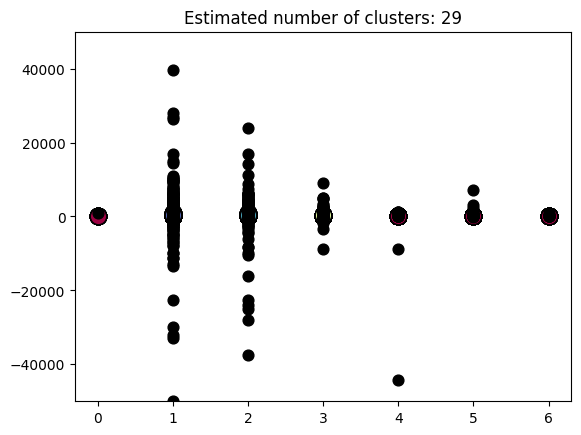

In [608]:
#menggunakan eps 2 dan min_samples 10 menghasilkan nilai silhouette(0.777) dan davies bouldin(4.283) terbaik
db = DBSCAN(eps=2, min_samples=10).fit(x)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Visualisasi
uniq_label = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = plt.cm.Spectral(np.linspace(0, 1, len(uniq_label)))
for k, col, in zip(uniq_label, colors):
    if k == -1:
        #black digunakan untuk noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    (
        plt.scatter(
            xy.iloc[:, 0], xy.iloc[:, 1], marker="o", facecolor=tuple(col), edgecolor="k", s=140
        )
    )

    xy = x[class_member_mask & ~core_samples_mask]
    (
        plt.scatter(
            xy.iloc[:, 0], xy.iloc[:, 1], marker="o", facecolor=tuple(col), edgecolor="k", s=60
        )
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.ylim(-50000, 50000)
plt.show()


In [609]:
# ANNOY NN
f = 9  # dimensi
t = AnnoyIndex(f, 'angular')  
for i, vec in enumerate(x):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

SystemError: <method 'add_item' of 'annoy.Annoy' objects> returned a result with an exception set